In [199]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [200]:
data = pd.read_csv("census_income_original_2.csv")
data

C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_16204\2699066626.py:1: DtypeWarning:

Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.



,ID,age,workclass,education,education.num,marital.status,occupation,relationship,race,Gender,capital.gain,capital.loss,hours.per.week,native.country,income,income_value
0,1,90,?,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,7986
1,2,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,4566
2,3,66,?,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,2571
3,4,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,8611
4,5,41,Private,Some-college,10,Separated,"Prof-,specialty",Own-child,White,Female,0,3900,40,United-States,<=50K,1553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33328,772,50,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,35,United-States,>50K,NaN
33329,773,34,Private,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,1887,40,United-States,>50K,NaN
33330,774,58,Private,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1887,40,United-States,>50K,NaN
33331,775,56,Self-emp-not-inc,5th-6th,3,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,67,United-States,>50K,NaN


# DATA VALIDATION:

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33333 entries, 0 to 33332
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              33333 non-null  int64 
 1   age             33333 non-null  int64 
 2   workclass       33333 non-null  object
 3   education       33333 non-null  object
 4   education.num   33333 non-null  int64 
 5   marital.status  33333 non-null  object
 6   occupation      33333 non-null  object
 7   relationship    33333 non-null  object
 8   race            33333 non-null  object
 9   Gender          33333 non-null  object
 10  capital.gain    33333 non-null  int64 
 11  capital.loss    33333 non-null  int64 
 12  hours.per.week  33333 non-null  int64 
 13  native.country  33333 non-null  object
 14  income          33333 non-null  object
 15  income_value    13190 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.1+ MB


In [202]:
data["age"].unique()

array([90, 82, 66, 54, 41, 34, 38, 74, 68, 45, 52, 32, 51, 46, 57, 22, 37,
       29, 61, 21, 33, 49, 23, 59, 60, 63, 53, 44, 43, 71, 48, 73, 67, 40,
       50, 42, 39, 55, 47, 31, 58, 62, 36, 72, 78, 83, 26, 70, 27, 35, 81,
       65, 25, 28, 56, 69, 20, 30, 24, 64, 75, 19, 77, 80, 18, 17, 76, 79,
       88, 84, 85, 86, 87], dtype=int64)

In [203]:
data["workclass"].unique()


array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [204]:
d = {"?" : "Other"}
data.replace({"workclass": d}, inplace = True)

In [205]:
data["education"].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [206]:
d = {'1st-4th' : 'Primary/Middle School', '5th-6th' : 'Primary/Middle School' ,'7th-8th': 'Primary/Middle School' , '9th' : 'Primary/Middle School',
       '10th' : 'High School', '11th' : 'High School' , '12th' : 'High School' }
data.replace({"education": d}, inplace = True)

In [207]:
data["marital.status"].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [208]:
data["occupation"].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-,specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair', 'Prof-specialty',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [209]:
d = {"?" : "Other-service"}
data.replace({"occupation": d}, inplace = True)

In [210]:
data["relationship"].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [211]:
data["race"].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [212]:
data["Gender"].unique()

array(['Female', 'female', 'Male', 'M', 'm', 'malee', 'male', 'f', 'm '],
      dtype=object)

In [213]:
d = {"female" : "Female" , "M" : "Male" , "m" : "Male" , "malee" : "Male", "male" : "Male", "f" :"Female", "m " : "Male"}
data.replace({"Gender": d}, inplace = True)

In [214]:
data["native.country"].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [223]:
d = {"?" : "Other" , "Hong": "Hong-Kong" ,"Outlying-US(Guam-USVI-etc)" : "United-States" }
data.replace({"native.country": d}, inplace = True)

In [216]:
data["native.country"].value_counts()

United-States         29883
Mexico                  646
Other                   603
Philippines             206
Germany                 140
Canada                  126
Puerto-Rico             116
El-Salvador             106
India                   103
Cuba                     96
England                  93
South                    85
Jamaica                  81
China                    80
Italy                    74
Dominican-Republic       70
Vietnam                  68
Guatemala                64
Japan                    63
Poland                   61
Columbia                 59
Taiwan                   54
Haiti                    44
Iran                     44
Portugal                 37
Nicaragua                34
Greece                   32
Peru                     31
France                   29
Ecuador                  28
Ireland                  24
Hong-Kong                21
Trinadad&Tobago          20
Cambodia                 19
Laos                     18
Thailand            

# Duplicated Data:

In [225]:
data.duplicated().sum()

234

In [226]:
data.drop_duplicates(keep = False, inplace = True) 

# Null Values:

In [227]:
data.isnull().sum()

ID                0
age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
Gender            0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [228]:
data.drop("income_value", axis=1, inplace=True)
#more than 50% of this column is null 

KeyError: "['income_value'] not found in axis"

In [229]:
data.isnull().sum()

ID                0
age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
Gender            0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

# EDA:

In [230]:
def age_avg(x):
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

In [231]:
data['age_avg'] = data['age'].apply(lambda x: age_avg(x))
data

,ID,age,workclass,education,education.num,marital.status,occupation,relationship,race,Gender,capital.gain,capital.loss,hours.per.week,native.country,income,age_avg
0,1,90,Other,HS-grad,9,Widowed,Other-service,Not-in-family,White,Female,0,4356,40,United-States,<=50K,Greater than 70
1,2,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,Greater than 70
2,3,66,Other,Some-college,10,Widowed,Other-service,Unmarried,Black,Female,0,4356,40,United-States,<=50K,61-70
3,4,54,Private,Primary/Middle School,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,51-60
11,12,38,Self-emp-not-inc,Prof-school,15,Never-married,"Prof-,specialty",Not-in-family,White,Male,0,2824,45,United-States,>50K,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,32558,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,19-30
32558,32559,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,31-40
32559,32560,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,51-60
32560,32561,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,19-30


C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_16204\3447574866.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_16204\3447574866.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_16204\3447574866.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_16204\3447574866.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_16204\3447574866.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_16204\3447574866.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_16204\3447574866.py:5: UserWarning:

FixedFormatte

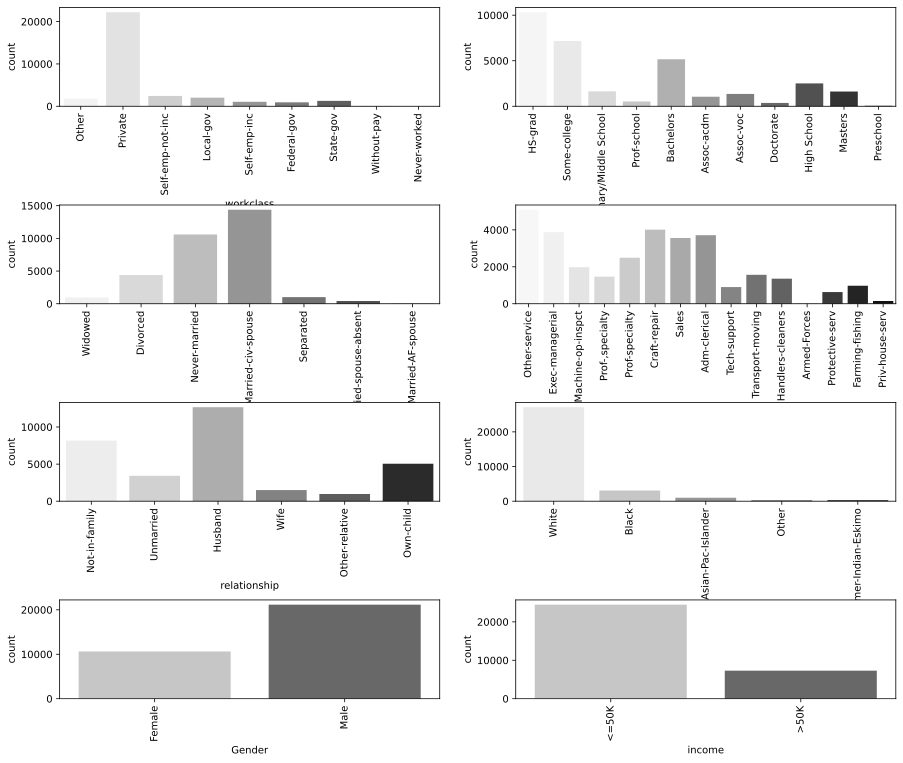

In [232]:
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'Gender', 'income']
plt.figure(figsize=(15,20))
for i, col in enumerate(categorical):
    ax = plt.subplot(6, 2, i+1)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    plt.subplots_adjust(hspace=1)


    sns.countplot(x=col, data=data, palette='Greys')



plt.show()

C:\Users\Abdelrahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



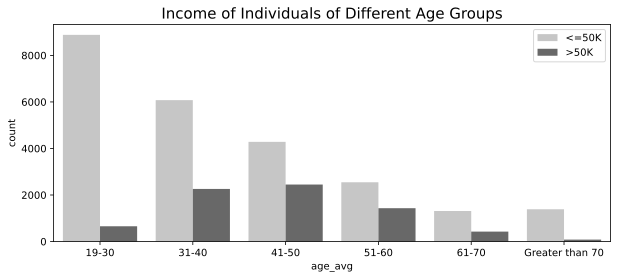

In [233]:
plt.figure(figsize=(10,4))
order = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(data['age_avg'], hue = data['income'], order = order, palette='Greys')
plt.title('Income of Individuals of Different Age Groups', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

C:\Users\Abdelrahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



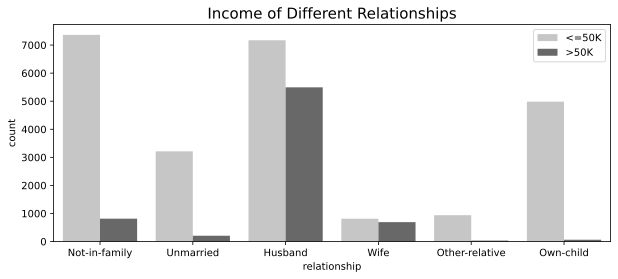

In [234]:
plt.figure(figsize=(10,4))
sns.countplot(data['relationship'], hue = data['income'], palette='Greys')
plt.title('Income of Different Relationships', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

C:\Users\Abdelrahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



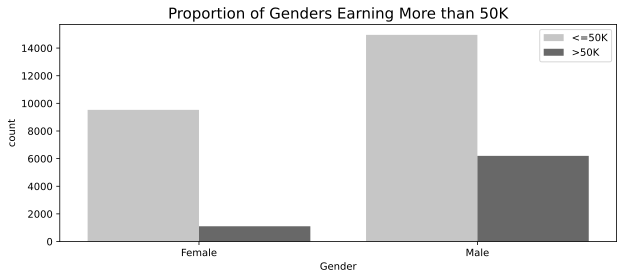

In [235]:
plt.figure(figsize=(10,4))
sns.countplot(data['Gender'], hue = data['income'], palette='Greys')
plt.title('Proportion of Genders Earning More than 50K', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

C:\Users\Abdelrahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



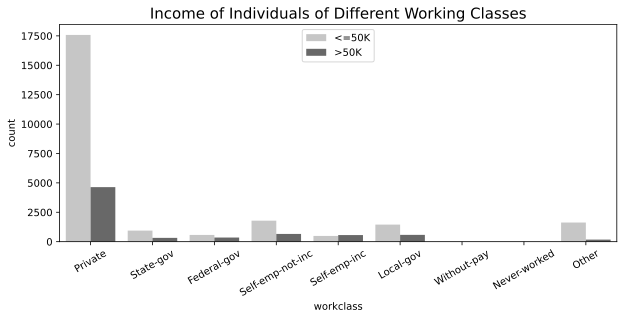

In [236]:
plt.figure(figsize=(10,4))
order = ['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked', 'Other']
sns.countplot(data['workclass'], hue = data['income'], order = order, palette='Greys')
plt.title('Income of Individuals of Different Working Classes', fontsize=15)
plt.xticks(fontsize=10,rotation = 30)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

C:\Users\Abdelrahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



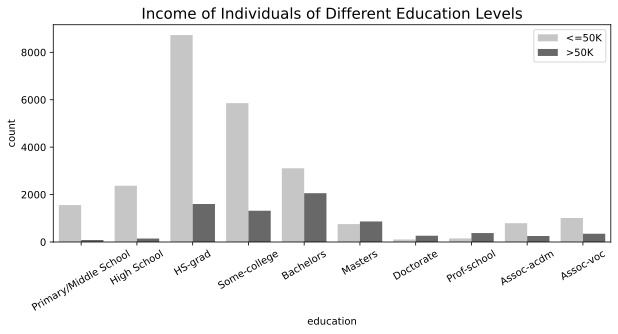

In [237]:
plt.figure(figsize=(10,4))
order = ['Primary/Middle School', 'High School', 
         'HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school','Assoc-acdm', 'Assoc-voc']
sns.countplot(data['education'], hue = data['income'], order= order, palette='Greys')
plt.title('Income of Individuals of Different Education Levels', fontsize=15)
plt.xticks(fontsize=10,rotation = 30)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

C:\Users\Abdelrahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



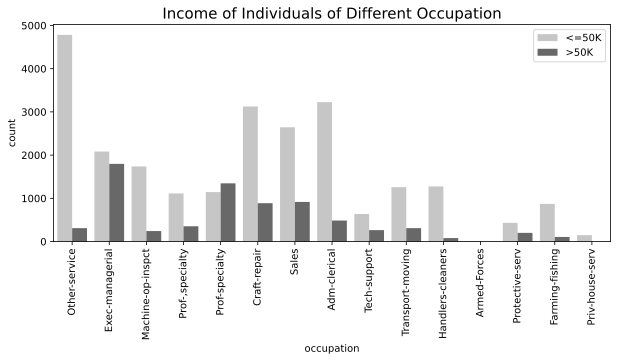

In [238]:
plt.figure(figsize=(10,4))
sns.countplot(data['occupation'], hue = data['income'], palette='Greys')
plt.title('Income of Individuals of Different Occupation', fontsize=15)
plt.xticks(fontsize=10,rotation = 90)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

C:\Users\Abdelrahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



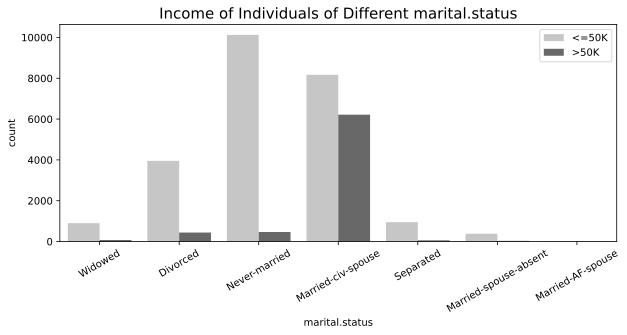

In [239]:
plt.figure(figsize=(10,4))
sns.countplot(data['marital.status'], hue = data['income'], palette='Greys')
plt.title('Income of Individuals of Different marital.status', fontsize=15)
plt.xticks(fontsize=10,rotation = 30)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

In [240]:
fig = px.pie(data, values='hours.per.week', names='Gender')
fig.update_traces(textinfo="label+percent")
fig.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


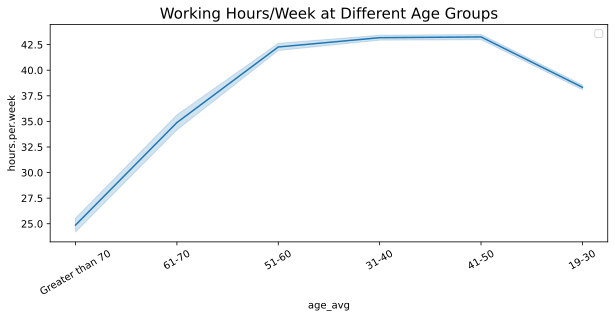

In [241]:
plt.figure(figsize=(10,4))
sns.lineplot(data=data, x="age_avg" , y="hours.per.week")
plt.title('Working Hours/Week at Different Age Groups', fontsize=15)
plt.xticks(fontsize=10,rotation = 30)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

C:\Users\Abdelrahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



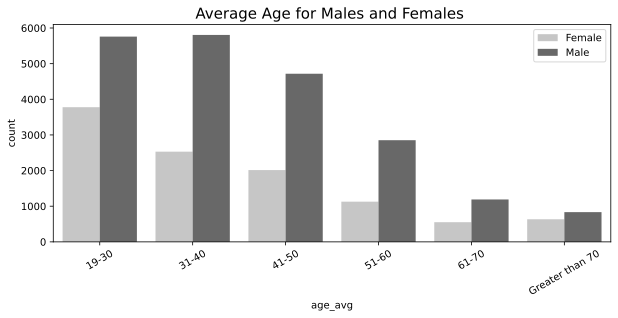

In [242]:
plt.figure(figsize=(10,4))
order = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(data['age_avg'], hue = data['Gender'], order = order, palette='Greys')
plt.title('Average Age for Males and Females ', fontsize=15)
plt.xticks(fontsize=10,rotation = 30)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

C:\Users\Abdelrahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



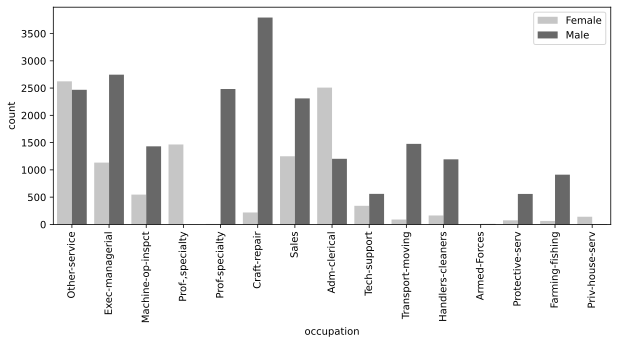

In [243]:
plt.figure(figsize=(10,4))
sns.countplot(data['occupation'], hue = data['Gender'],  palette='Greys')
plt.xticks(fontsize=10,rotation = 90)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

C:\Users\Abdelrahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



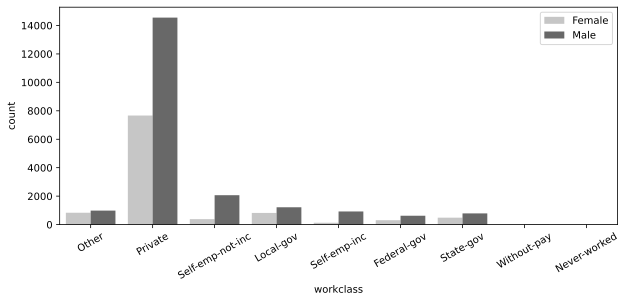

In [244]:
plt.figure(figsize=(10,4))
sns.countplot(data['workclass'], hue = data['Gender'], palette='Greys')
plt.xticks(fontsize=10,rotation = 30)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


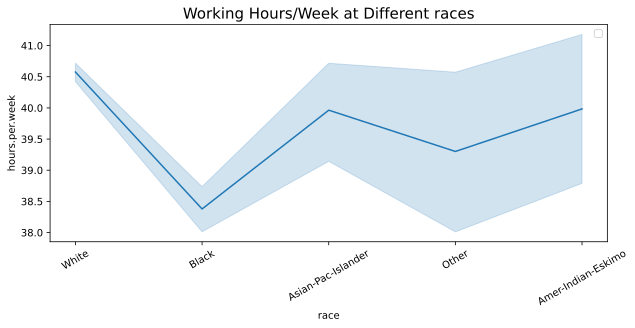

In [245]:
plt.figure(figsize=(10,4))
sns.lineplot(data=data, x="race" , y="hours.per.week")
plt.title('Working Hours/Week at Different races', fontsize=15)
plt.xticks(fontsize=10,rotation = 30)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

C:\Users\Abdelrahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



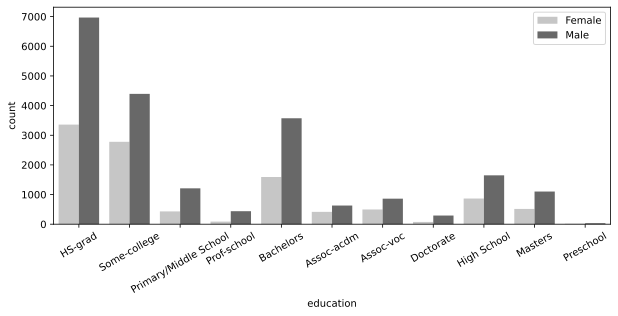

In [246]:
plt.figure(figsize=(10,4))
sns.countplot(data['education'], hue = data['Gender'], palette='Greys')
plt.xticks(fontsize=10,rotation = 30)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

C:\Users\Abdelrahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



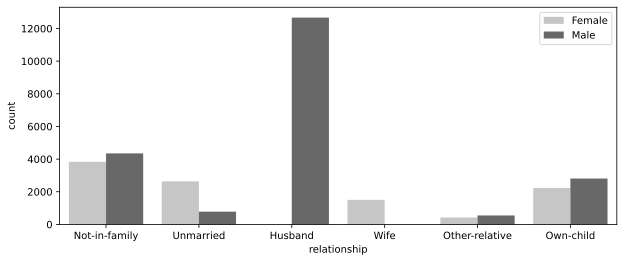

In [247]:
plt.figure(figsize=(10,4))
sns.countplot(data['relationship'], hue = data['Gender'], palette='Greys')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

C:\Users\Abdelrahman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



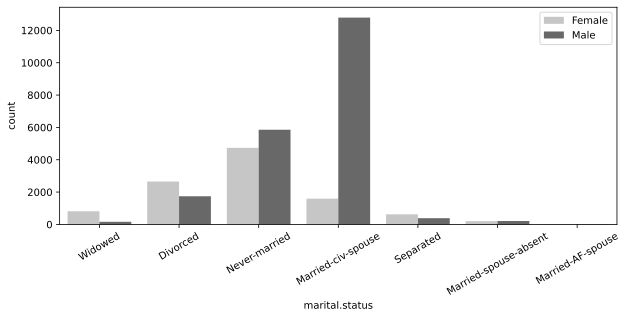

In [248]:
plt.figure(figsize=(10,4))
sns.countplot(data['marital.status'], hue = data['Gender'], palette='Greys')
plt.xticks(fontsize=10,rotation = 30)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

In [249]:
data.to_csv("C:\\Users\\Abdelrahman\\Documents\\data\\Project #0\\census_income_original.csv")

In [250]:
data

,ID,age,workclass,education,education.num,marital.status,occupation,relationship,race,Gender,capital.gain,capital.loss,hours.per.week,native.country,income,age_avg
0,1,90,Other,HS-grad,9,Widowed,Other-service,Not-in-family,White,Female,0,4356,40,United-States,<=50K,Greater than 70
1,2,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,Greater than 70
2,3,66,Other,Some-college,10,Widowed,Other-service,Unmarried,Black,Female,0,4356,40,United-States,<=50K,61-70
3,4,54,Private,Primary/Middle School,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,51-60
11,12,38,Self-emp-not-inc,Prof-school,15,Never-married,"Prof-,specialty",Not-in-family,White,Male,0,2824,45,United-States,>50K,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,32558,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,19-30
32558,32559,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,31-40
32559,32560,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,51-60
32560,32561,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,19-30


In [251]:
data.drop(["ID", "education", "age_avg"], axis=1, inplace=True)

# preprocessing:

In [252]:
# Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer

In [253]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['Gender', 'income']),
    remainder='passthrough')

transformed = transformer.fit_transform(data)
data = pd.DataFrame(transformed, columns=transformer.get_feature_names())

C:\Users\Abdelrahman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [254]:
data.rename(columns = {'onehotencoder__x0_Female':'Gender', 'onehotencoder__x1_<=50K':'income'}, inplace = True)
data.drop(['onehotencoder__x0_Male' , 'onehotencoder__x1_>50K'], axis = 1, inplace = True);

In [255]:
cols = ['workclass', 'marital.status','occupation','relationship','race','native.country']
  
data[cols] = data[cols].apply(LabelEncoder().fit_transform)

In [ ]:
data.info()

In [ ]:
data = data.astype('int')
data.info()

<AxesSubplot:>

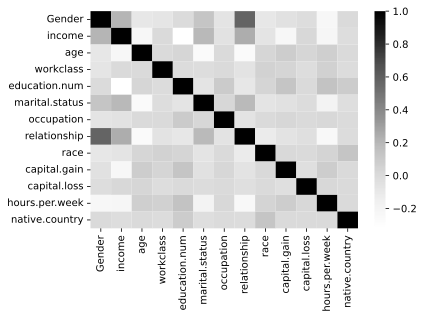

In [196]:
sns.heatmap(data.corr(), annot = False, color = 'black', cmap = 'Greys')

In [112]:
#spliting dataset

In [113]:
first_column = data.pop('income')
data.insert(0, 'income', first_column)

In [114]:
x= data.iloc[:,1:]
y= data.iloc[:,0]

In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=0)

In [116]:
#feature selection

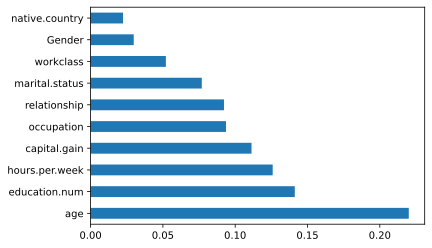

In [117]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train) 

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [118]:
data.drop(["race" , "capital.loss"], axis = 1 , inplace=True)
data

,income,Gender,age,workclass,education.num,marital.status,occupation,relationship,capital.gain,hours.per.week,native.country
0,1,1,90,3,9,6,7,1,0,40,38
1,1,1,82,4,9,6,3,1,0,18,38
2,1,1,66,3,10,6,7,4,0,40,38
3,1,1,54,4,4,0,6,4,0,40,38
4,1,1,41,4,10,5,9,3,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...
32254,1,0,37,4,9,2,2,0,0,50,38
32255,1,0,58,4,9,2,2,0,0,40,38
32256,1,0,49,4,9,2,6,0,0,40,38
32257,1,0,57,4,11,2,10,0,0,45,38


In [119]:
x= data.iloc[:,1:]
y= data.iloc[:,0]

In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=0)

In [121]:
#scaling
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [122]:
#sambling
data.shape

(32259, 11)

<AxesSubplot:xlabel='income', ylabel='count'>

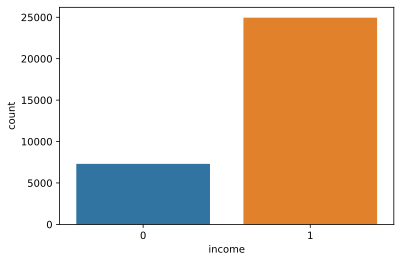

In [123]:
sns.countplot(x= "income", data = data)

In [124]:
from collections import Counter
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_train, y_train = smote_enn.fit_resample(X_train,y_train)
print(sorted(Counter(y_train).items()))

[(0, 14840), (1, 14420)]


In [125]:
#Hyperparameters tuning for XGBOOSTE using RANDOMIZEDSEARCH: 
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

XGB = XGBClassifier()

parameters = {'objective':['binary:logistic'],
              'booster':['gbtree','gblinear', 'dart'],
              'learning_rate': [0.1], 
              'max_depth': [7,10,15,20],   
              'min_child_weight': [10,15,20,25],
              'colsample_bytree': [0.8, 0.9, 1],
              'n_estimators': [300,400,500,600],
              "reg_alpha"   : [0.5,0.2,1],
              "reg_lambda"  : [2,3,5],
              "gamma"       : [1,2,3]}

clf = RandomizedSearchCV(XGB,parameters, random_state=0)
search = clf.fit(X_train,y_train)
search.best_params_

[18:29:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:29:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:29:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64

{'reg_lambda': 3,
 'reg_alpha': 0.5,
 'objective': 'binary:logistic',
 'n_estimators': 500,
 'min_child_weight': 10,
 'max_depth': 20,
 'learning_rate': 0.1,
 'gamma': 2,
 'colsample_bytree': 0.9,
 'booster': 'dart'}

In [126]:
from xgboost import XGBClassifier
import multiprocessing
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

model2 = XGBClassifier(reg_lambda=3,
 reg_alpha= 0.5,
 objective = 'binary:logistic',
 n_estimators= 500,
 min_child_weight= 10,
 max_depth= 20,
 learning_rate= 0.1,
 gamma= 2,
 colsample_bytree= 0.9,
 booster= 'dart')

model2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='dart', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=10,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.5, reg_lambda=3, ...)

In [127]:
pret = model2.predict(X_train)
print ("train: ", accuracy_score(pret,y_train )) 

train:  0.9857826384142173


In [128]:
pre = model2.predict(X_test)
print ("test: ", accuracy_score(pre,y_test))

test:  0.819125852448853


In [129]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(y_test, pre, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.58      0.80      0.67      1496
     class 1       0.93      0.83      0.88      4956

    accuracy                           0.82      6452
   macro avg       0.76      0.81      0.77      6452
weighted avg       0.85      0.82      0.83      6452



# Pandas porfiling:

In [136]:
from pandas_profiling import ProfileReport

In [138]:
profile = ProfileReport(data)